Лабораторна робота 5 Тема: Метод ліктя. Кластеризація даних.

In [129]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [130]:
# Завдання 1.
# Завантажити датасет Ірис. Роздрукувати перші 5 рядочків.

iris = load_iris()
x = iris.data
df = pd.DataFrame(x, columns = iris.feature_names)

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


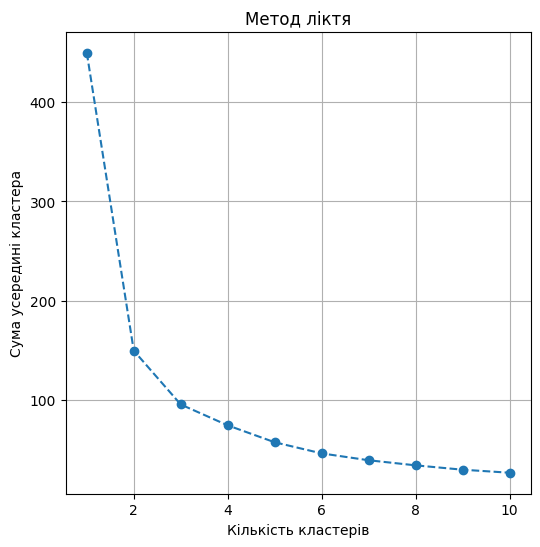

In [131]:
# Методом ліктя і методом силуєтів визначити оптимальну кількість кластерів.
# Візуалізувати кластери.

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

df_2d = pd.DataFrame(df_scaled, columns = iris.feature_names).iloc[:, 1:]
wcss_2d = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
  kmeans.fit(df_2d)
  wcss_2d.append(kmeans.inertia_)

plt.figure(figsize = (6, 6))
plt.plot(range(1, 11), wcss_2d, marker = 'o', linestyle = '--')
plt.title('Метод ліктя')
plt.xlabel('Кількість кластерів')
plt.ylabel('Сума усередині кластера')
plt.grid(True)
plt.show()

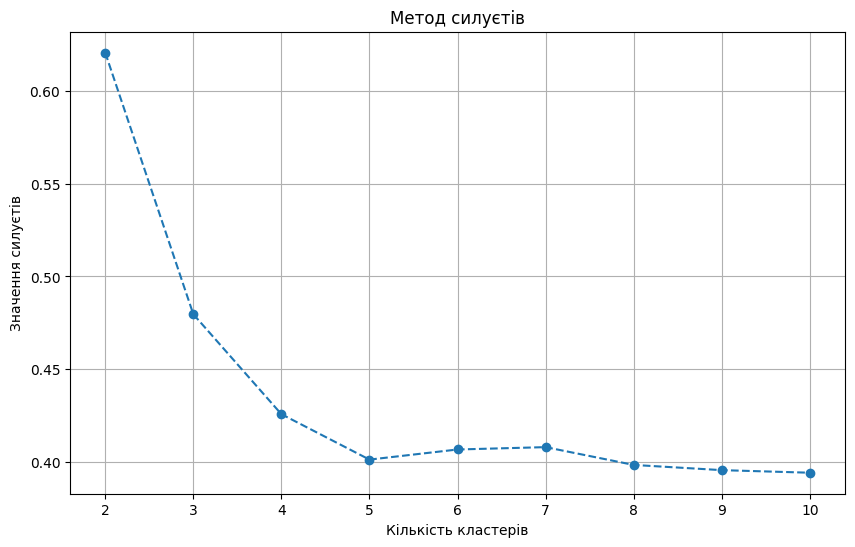

In [132]:
silhouette_scores = []
for i in range(2, 11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
  cluster_labels = kmeans.fit_predict(df_2d)
  silhouette_avg = silhouette_score(df_2d, cluster_labels)
  silhouette_scores.append(silhouette_avg)

plt.figure(figsize = (10, 6))
plt.plot(range(2, 11), silhouette_scores, marker = 'o', linestyle = '--')
plt.title('Метод силуєтів')
plt.xlabel('Кількість кластерів')
plt.ylabel('Значення силуєтів')
plt.grid(True)
plt.show()

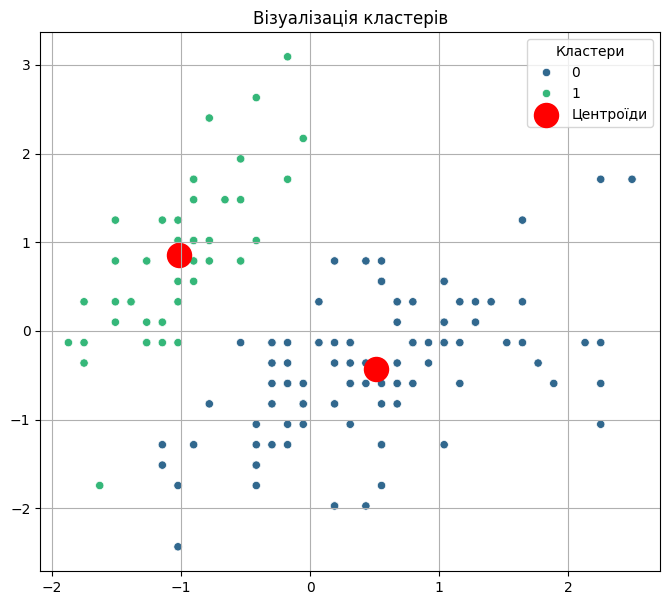

In [133]:
import seaborn as sns
kmeans = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
clusters = kmeans.fit_predict(df_scaled)

plt.figure(figsize = (8, 7))
sns.scatterplot(x = df_scaled[:, 0], y = df_scaled[:, 1], hue = clusters, palette = 'viridis', legend = 'full')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'red', label = 'Центроїди')
plt.title('Візуалізація кластерів')
plt.legend(title = 'Кластери')
plt.grid(True)
plt.show()

Висновок: У ході виконання лабораторної роботи було виконано кластеризацію даних із датасету Iris за допомогою ліктьового та силуетного методів, також проведено візуалізацію кластерів. Результати виконання роботи показали, що оптимальна кількість кластерів дорівнює трьом.

In [134]:
# Завдання 2
# Завантажити датасет

from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/Student_data.csv'

df = pd.read_csv(file_path)
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [135]:
# Реалізувати попередній аналіз даних:
# Перевірити на пропущені значення. При наявності замінити на середнє за стовпцем.

print("Пропущені значеня:")
df.isnull().sum()

Пропущені значеня:


,0
StudentID,0
Age,0
Gender,0
Ethnicity,0
ParentalEducation,0
StudyTimeWeekly,0
Absences,0
Tutoring,0
ParentalSupport,0
Extracurricular,0


In [136]:
# Перевірити на дублікати. Якщо є – видалити.

print("Наявність дублікатів:")
df.duplicated().sum()

Наявність дублікатів:


0

In [137]:
# Вивести описову статистику.

df.describe()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


In [138]:
# Вивести розмір датасета, типи даних.

df.shape

(2392, 15)

In [139]:
df.dtypes

,0
StudentID,int64
Age,int64
Gender,int64
Ethnicity,int64
ParentalEducation,int64
StudyTimeWeekly,float64
Absences,int64
Tutoring,int64
ParentalSupport,int64
Extracurricular,int64


In [140]:
# Визначити, яку задачу розв’язуємо (регресія чи класифікація). Побудувати 3
# моделі на вибір для визначення оцінки. Підібрати оптимальні параметри.

X = df.drop('GradeClass', axis = 1)
y = df['GradeClass']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [141]:
# Лінійна регресія

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

param_grid_lr = {
    'fit_intercept': [True, False],
    'copy_X': [True, False]
}

lr = LinearRegression()
grid_search_lr = GridSearchCV(estimator=lr, param_grid=param_grid_lr, cv=5, n_jobs=-1, verbose=2)
grid_search_lr.fit(X_train_scaled, y_train)

print("Оптимальні параметри лінійої регресії: ", grid_search_lr.best_params_)
print("Найкращий бал перехресної перевірки лінійої регресії:", grid_search_lr.best_score_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Оптимальні параметри лінійої регресії:  {'copy_X': True, 'fit_intercept': True}
Найкращий бал перехресної перевірки лінійої регресії: 0.6125426808478212


In [142]:
# Дерево рішень

param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt = DecisionTreeClassifier(random_state = 42)

grid_search_dt = GridSearchCV(estimator = dt, param_grid = param_grid_dt, cv = 5, n_jobs = -1, verbose = 2)
grid_search_dt.fit(X_train, y_train)

print("Оптимальні параметри дерева рішень:", grid_search_dt.best_params_)
print("Найкращий бал перехресної перевірки дерева рішень:", grid_search_dt.best_score_)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Оптимальні параметри дерева рішень: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2}
Найкращий бал перехресної перевірки дерева рішень: 0.9351728568889861


In [143]:
# Метод опорних векторів SVM

param_grid_svm = {
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

svm = SVC()

grid_search_svm = GridSearchCV(estimator = svm, param_grid = param_grid_svm, cv = 5, n_jobs = -1, verbose = 2)
grid_search_svm.fit(X_train, y_train)

#Найкращі параметри й точність.
print("Оптимальні параметри методу опорних векторів:", grid_search_svm.best_params_)
print("Найкращий бал перехресної перевірки методу опорних векторів:", grid_search_svm.best_score_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Оптимальні параметри методу опорних векторів: {'gamma': 'scale', 'kernel': 'linear'}
Найкращий бал перехресної перевірки методу опорних векторів: 0.8536191270351182


In [147]:
# Оцінити моделі.

y_pred_lr = grid_search_lr.predict(X_test_scaled)
y_pred_dt = grid_search_dt.predict(X_test)
y_pred_rf = grid_search_svm.predict(X_test)

print("Оцінка моделі лінійої регресії:", mean_squared_error(y_test, y_pred_lr, squared=False))
print("Оцінка моделі дерева рішень:", accuracy_score(y_test, y_pred_dt))
print("Оцінка моделі методу опорних векторів:", accuracy_score(y_test, y_pred_rf))
print()

print("Дерево рішень має найвищу оцінку моделі.")

print("Звіт про класифікацію моделі дерева рішень:")
print(classification_report(y_test, y_pred_dt))

Оцінка моделі лінійої регресії: 0.7283622487830835
Оцінка моделі дерева рішень: 0.9248434237995825
Оцінка моделі методу опорних векторів: 0.8183716075156576

Дерево рішень має найвищу оцінку моделі.
Звіт про класифікацію моделі дерева рішень:
              precision    recall  f1-score   support

         0.0       0.79      0.68      0.73        22
         1.0       0.81      0.94      0.87        49
         2.0       0.95      0.88      0.91        85
         3.0       0.89      0.91      0.90        86
         4.0       0.97      0.97      0.97       237

    accuracy                           0.92       479
   macro avg       0.88      0.88      0.88       479
weighted avg       0.93      0.92      0.92       479



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


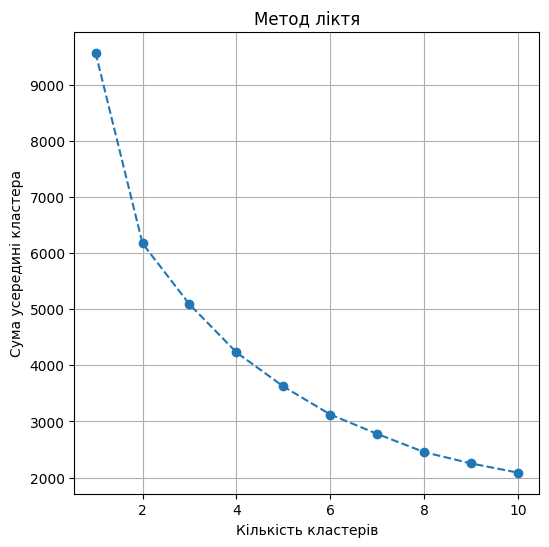

In [150]:
#Визначити методом ліктя і силуєтів оптимальну кількість кластерів.

features = df[['Age', 'StudyTimeWeekly', 'Absences', 'GPA']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
  kmeans.fit(X_scaled)
  wcss.append(kmeans.inertia_)

plt.figure(figsize = (6, 6))
plt.plot(range(1, 11), wcss, marker = 'o', linestyle = '--')
plt.title('Метод ліктя')
plt.xlabel('Кількість кластерів')
plt.ylabel('Сума усередині кластера')
plt.grid(True)
plt.show()

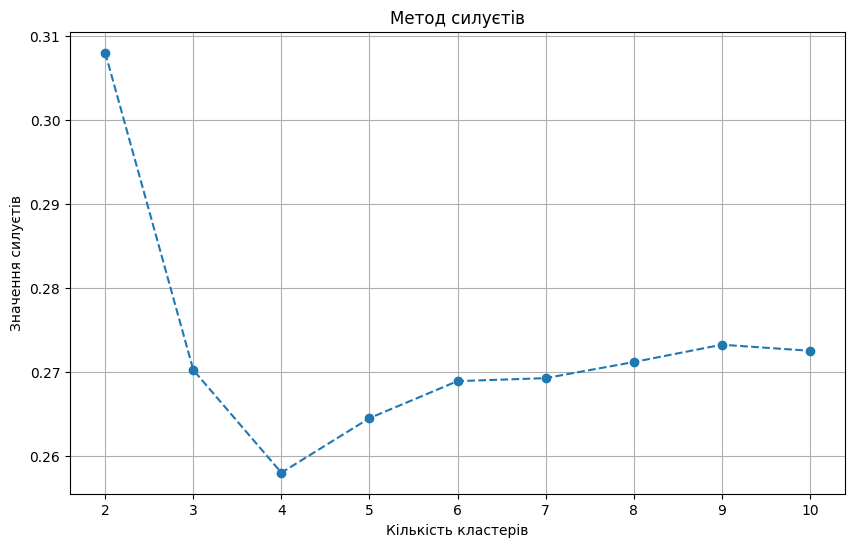

In [152]:
silhouette_scores = []
for i in range(2, 11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
  cluster_labels = kmeans.fit_predict(X_scaled)
  silhouette_avg = silhouette_score(X_scaled, cluster_labels)
  silhouette_scores.append(silhouette_avg)

plt.figure(figsize = (10, 6))
plt.plot(range(2, 11), silhouette_scores, marker = 'o', linestyle = '--')
plt.title('Метод силуєтів')
plt.xlabel('Кількість кластерів')
plt.ylabel('Значення силуєтів')
plt.grid(True)
plt.show()

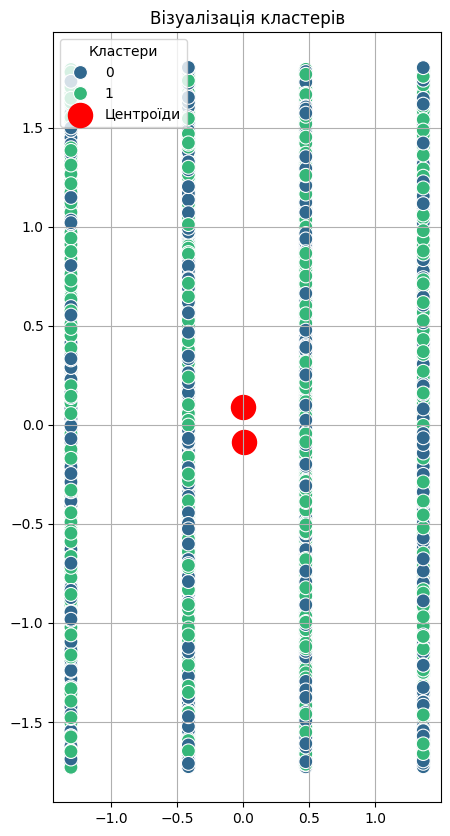

In [160]:
# Візуалізувати кластери.

kmeans = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
clusters = kmeans.fit_predict(X_scaled)

plt.figure(figsize = (5, 10))
sns.scatterplot(x = X_scaled[:, 0], y = X_scaled[:, 1], hue = clusters, palette = 'viridis', legend = 'full', s = 100)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'Red', label = 'Центроїди')

plt.title('Візуалізація кластерів')
plt.legend(title='Кластери')
plt.grid(True)
plt.show()

Висновок: У ході виконання лабораторної роботи було проведено аналіз датасету Student_data. Для прогнозування оцінок були побудовані моделі лінійної регресії, дерева рішень та модель методу опорних векторів. Завдяки дослідженню вдалось дізнатись, що найкращу точність у цьому датасеті показує модель дерево рішень. Були застосовані силуетний метод та метод ліктя для кластеризації даних, які знайшли та візалізували оптимальну кількість кластерів - два.Результати роботи були завантажені на відповідний Github-репозиторій.